# Linear Regression from Scratch

## Importing necessary modules

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import r2_score as r2
import warnings
warnings.filterwarnings('ignore')

## Importing data

I will be using a fish weight prediction dataset for this linear regression implementation. (dataset: https://www.kaggle.com/datasets/aungpyaeap/fish-market)

In [16]:
df = pd.read_csv('Fish.csv')
X = df.drop(['Weight'], axis = 1)
y = pd.DataFrame(df['Weight'])

In [17]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [18]:
X.shape

(159, 6)

In [19]:
X.isna().sum()

Species    0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## One-hot encoding the Species Field

In [20]:
X = pd.get_dummies(X, columns = ['Species'], drop_first = True, dtype = int)
X

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


## Train-test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## Scaling data

In [22]:
class StandardSc:
    '''
    
        Standardising the data, rescales the 
        data so that mean of data is 0 
        and standard deviation is 1.
        Computes the mean and standard deviation
        on the training set first, and uses those values
        to transform the test set.
        
    '''
    
    def __init__(self):
        
        self.std = []
        self.mean = []
        
    def fit_transform(self, X):
        
        for column in X.columns:
            self.std.append(X[column].std())
            self.mean.append(X[column].mean())
            X[column] = (X[column] - X[column].mean())/X[column].std()
            
        return X
    
    def transform(self, X):
        #try-except ensures the Scaler has been fitted before transforming the training data.
        try:
            assert(self.std !=[] and self.mean != [])
            columns = X.columns
            for i in range(len(columns)):
                X[columns[i]] = (X[columns[i]] - self.mean[i])/self.std[i]
            return X
        
        except AssertionError as e:
            e.args += ('StandardScaler has not been fitted yet.',)
            raise
            

    
scaler = StandardSc()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Plotting 

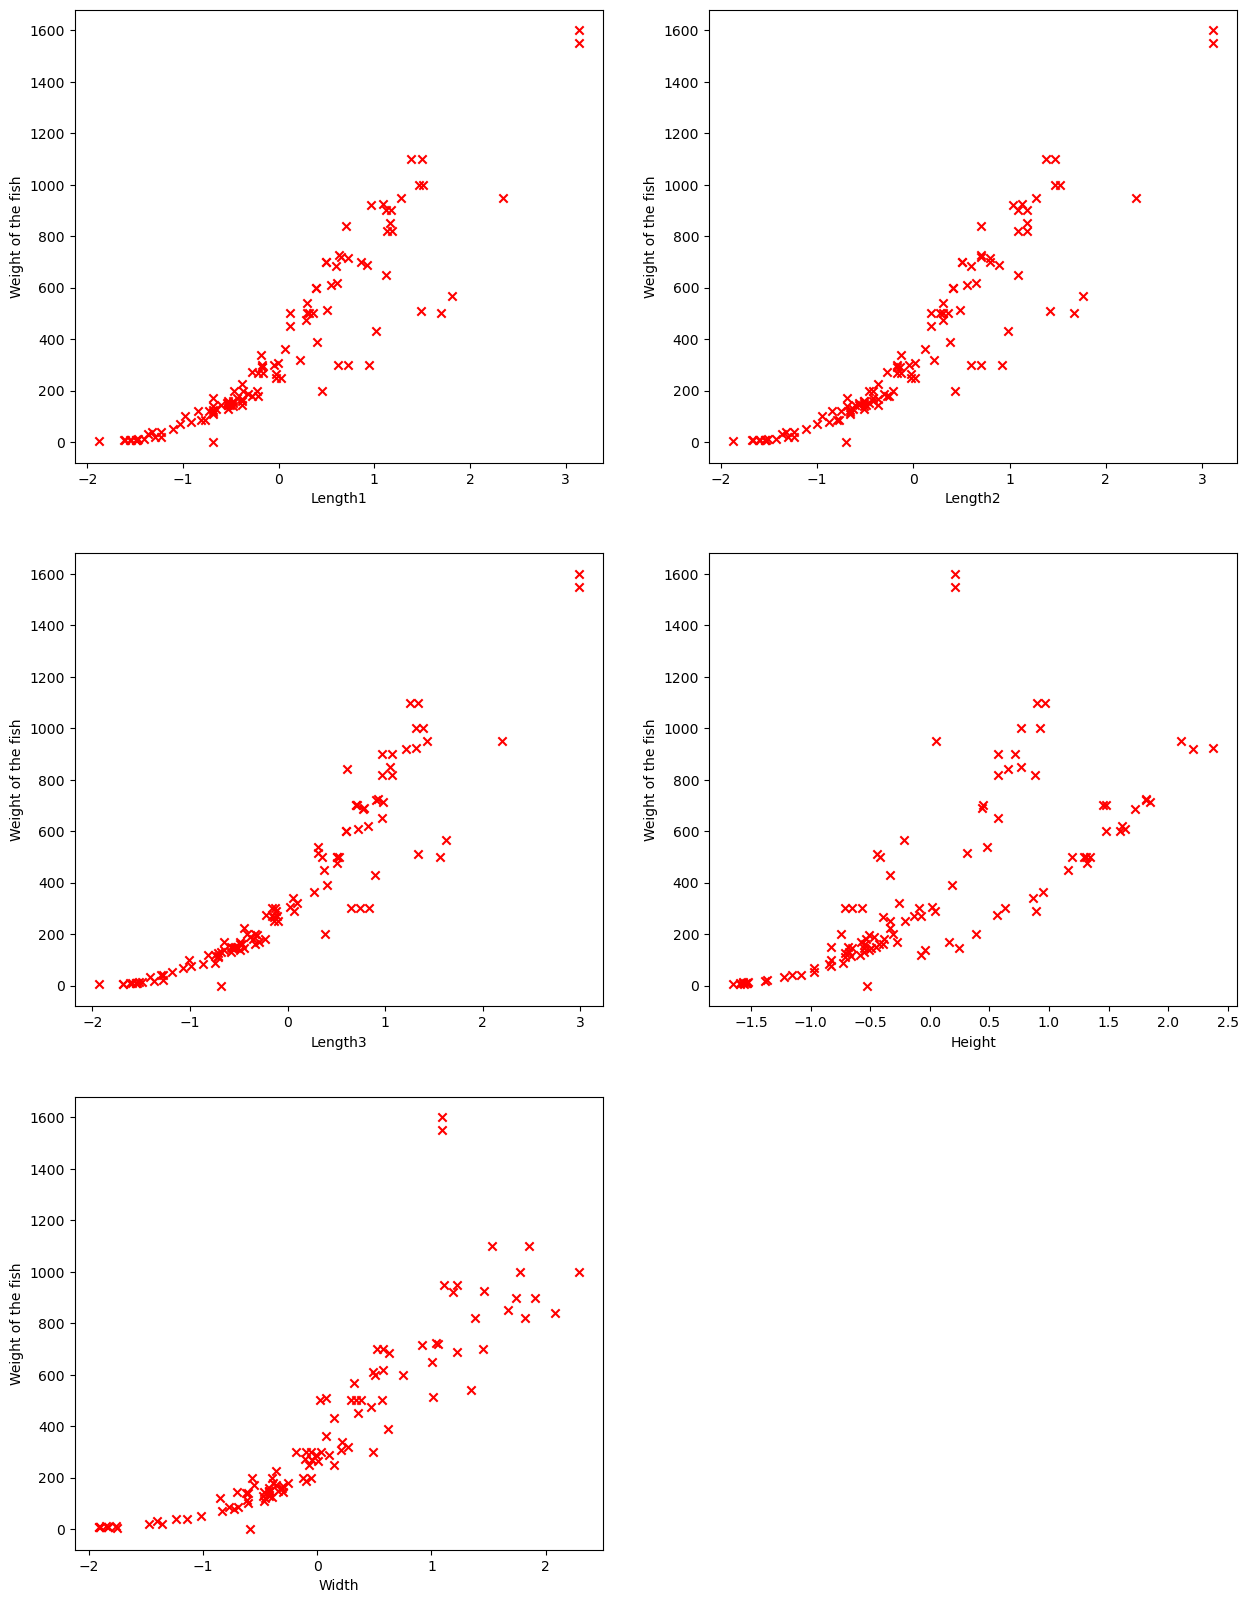

In [23]:
def plots(X, y):
                
    fig = plt.figure(figsize = (15, 20))              
    for i in range(1, len(X.columns[:5]) + 1):
        plt.subplot(3, 2, i)
        plt.scatter(X.iloc[:, i - 1], y, marker = 'x', color = 'r')
        plt.xlabel(X.columns[i - 1])
        plt.ylabel('Weight of the fish')

plots(X_train, y_train)  

## Linear Regression Model

In [24]:
class LinearRegression:
    
    '''
        Implements Linear Regression.
        For n features,
        y_hat = w1 * x1 + w2 * x2 + ... + wn  * xn + b, 
        is the prediction.
        Uses batch gradient descent to optimize params w and b.
        
        Args:
            alpha(float)   : Learning rate
            num_iters(int) : Number of iterations
        
        Computes: 
            fit     : function to optimize params w and b from given training dataset.
            predict : Uses w and b to make predictions on test dataset.
        
    '''
    def __init__(self, alpha, num_iters):
        
        self.alpha = alpha
        self.num_iters = num_iters
        
    def compute_error(self, X, y):
        
        error = (np.dot(X, self.w) + self.b) - y
        return error
        
    def compute_cost(self, X, y):
        
        error = self.compute_error(X, y)
        total_cost = np.dot(error.T, error)
        total_cost /= (2 * self.m)
        return total_cost
        
    def compute_gradient(self, X, y):
        
        error = self.compute_error(X, y)
        self.dw = np.dot(X.T, error)
        self.dw = np.dot(X.T, error)
        self.dw /= self.m
        self.db = np.sum(error)
        self.db /= self.m
        
    def fit(self, X, y):
        
        X = np.array(X)
        y = np.array(y)
        self.w = np.random.rand(X.shape[1], 1)
        self.b = np.random.rand(1, 1)
        self.dw = np.zeros((1, X.shape[1]))
        self.db = np.zeros((1, 1))
        self.m = X.shape[0]
        
        J_history = []
        
        for i in range(self.num_iters):
            self.compute_gradient(X, y)
            self.w = self.w - self.alpha * self.dw
            self.b = self.b - self.alpha * self.db
            if i < 100000:
                cost = self.compute_cost(X, y)
                J_history.append(cost[0])       
            
            if i % math.ceil(self.num_iters / 10) == 0:
                print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            if (i + 1) == self.num_iters:
                print(f"Final Training Cost: {float(J_history[-1]):8.2f}  ")
            
        return J_history
                 
    def predict(self, X_test):
        
        m_test = X_test.shape[0]
        predicted = np.zeros(m_test)
        predicted = np.dot(X_test, self.w) + self.b
        
        return predicted
    
    def test_cost(self, X_test, y_test):
        
        y_test = np.array(y_test)
        m_test = X_test.shape[0]
        test_error = (np.dot(X_test, self.w) + self.b) - y_test
        cost = (np.dot(test_error.T, test_error))/(2 * m_test)
        return cost[0]
    
    def r2_score(self, predict, y_test):
        
        y_test = np.array(y_test)
        diff = y_test - predict
        diff_from_mean = y_test - np.mean(y_test)
        r2_score_ = 1 - (np.dot(diff.T, diff))/(np.dot(diff_from_mean.T, diff_from_mean))
        return r2_score_
    
    def best_fit_plot(self, X, target, ylabel):

        fig = plt.figure(figsize = (15, 20))
        for i in range(1, len(X.columns[:5]) + 1):
            predicted = float(self.w[i - 1]) * X.iloc[:, i - 1] + float(self.b)
            plt.subplot(3, 2, i)
            plt.scatter(X.iloc[:, i - 1], target, marker = 'x', color = 'r')
            plt.plot(X.iloc[:, i - 1], predicted, c = 'b')
            plt.xlabel(X.columns[i - 1])
            plt.ylabel(ylabel)

    def scatter_plots(self, X, y, predict, ylabel):

        fig = plt.figure(figsize = (15, 20))
        for i in range(1, len(X.columns) + 1):
            plt.subplot(6, 2, i)
            plt.scatter(X.iloc[:, i - 1], y, color='red', alpha=0.4)
            plt.scatter(X.iloc[:, i - 1], predict, color='blue', alpha=0.4)
            plt.xlabel(X.columns[i - 1])
            plt.ylabel(ylabel)

    


## Training the model

In [25]:
iterations = 500
alpha = 0.01
LR = LinearRegression(alpha, iterations)
J_history = LR.fit(X_train, y_train)
predict = LR.predict(X_test)

Iteration    0: Cost 122200.65   
Iteration   50: Cost 33346.18   
Iteration  100: Cost 15687.25   
Iteration  150: Cost  9094.86   
Iteration  200: Cost  6526.10   
Iteration  250: Cost  5475.77   
Iteration  300: Cost  5011.18   
Iteration  350: Cost  4781.23   
Iteration  400: Cost  4651.31   
Iteration  450: Cost  4568.19   
Final Training Cost:  4510.65  


## Evaluating the model

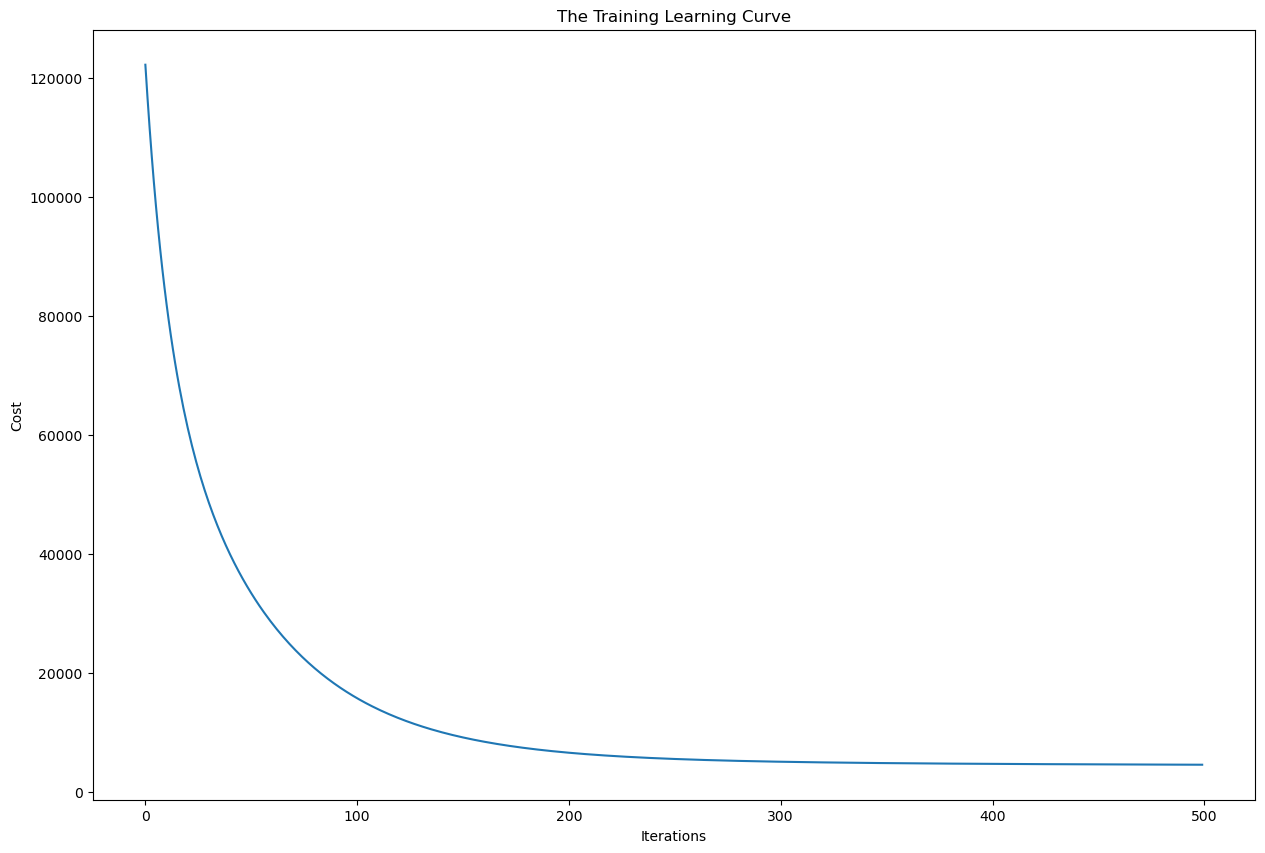

In [26]:
X_plot = [i for i in range(iterations)]
Y_plot = J_history
fig = plt.figure(figsize=(15, 10))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('The Training Learning Curve')
plt.plot(X_plot,Y_plot, color='tab:blue')

The training learning curve decreases as expected.

In [27]:
test_cost = LR.test_cost(np.array(X_test), y_test) 
r2_score = LR.r2_score(predict, y_test)
print(f"Testing cost: {round(float(test_cost))}")
print(f"R2 Score: {float(r2_score):.2f}")

Testing cost: 5947
R2 Score: 0.92


The testing cost is only slightly higher than the learning cost, which shows that the model generalizes well. Plotting 
the best fit lines as per the parameters of the model for some features.

## Plotting Graphs 

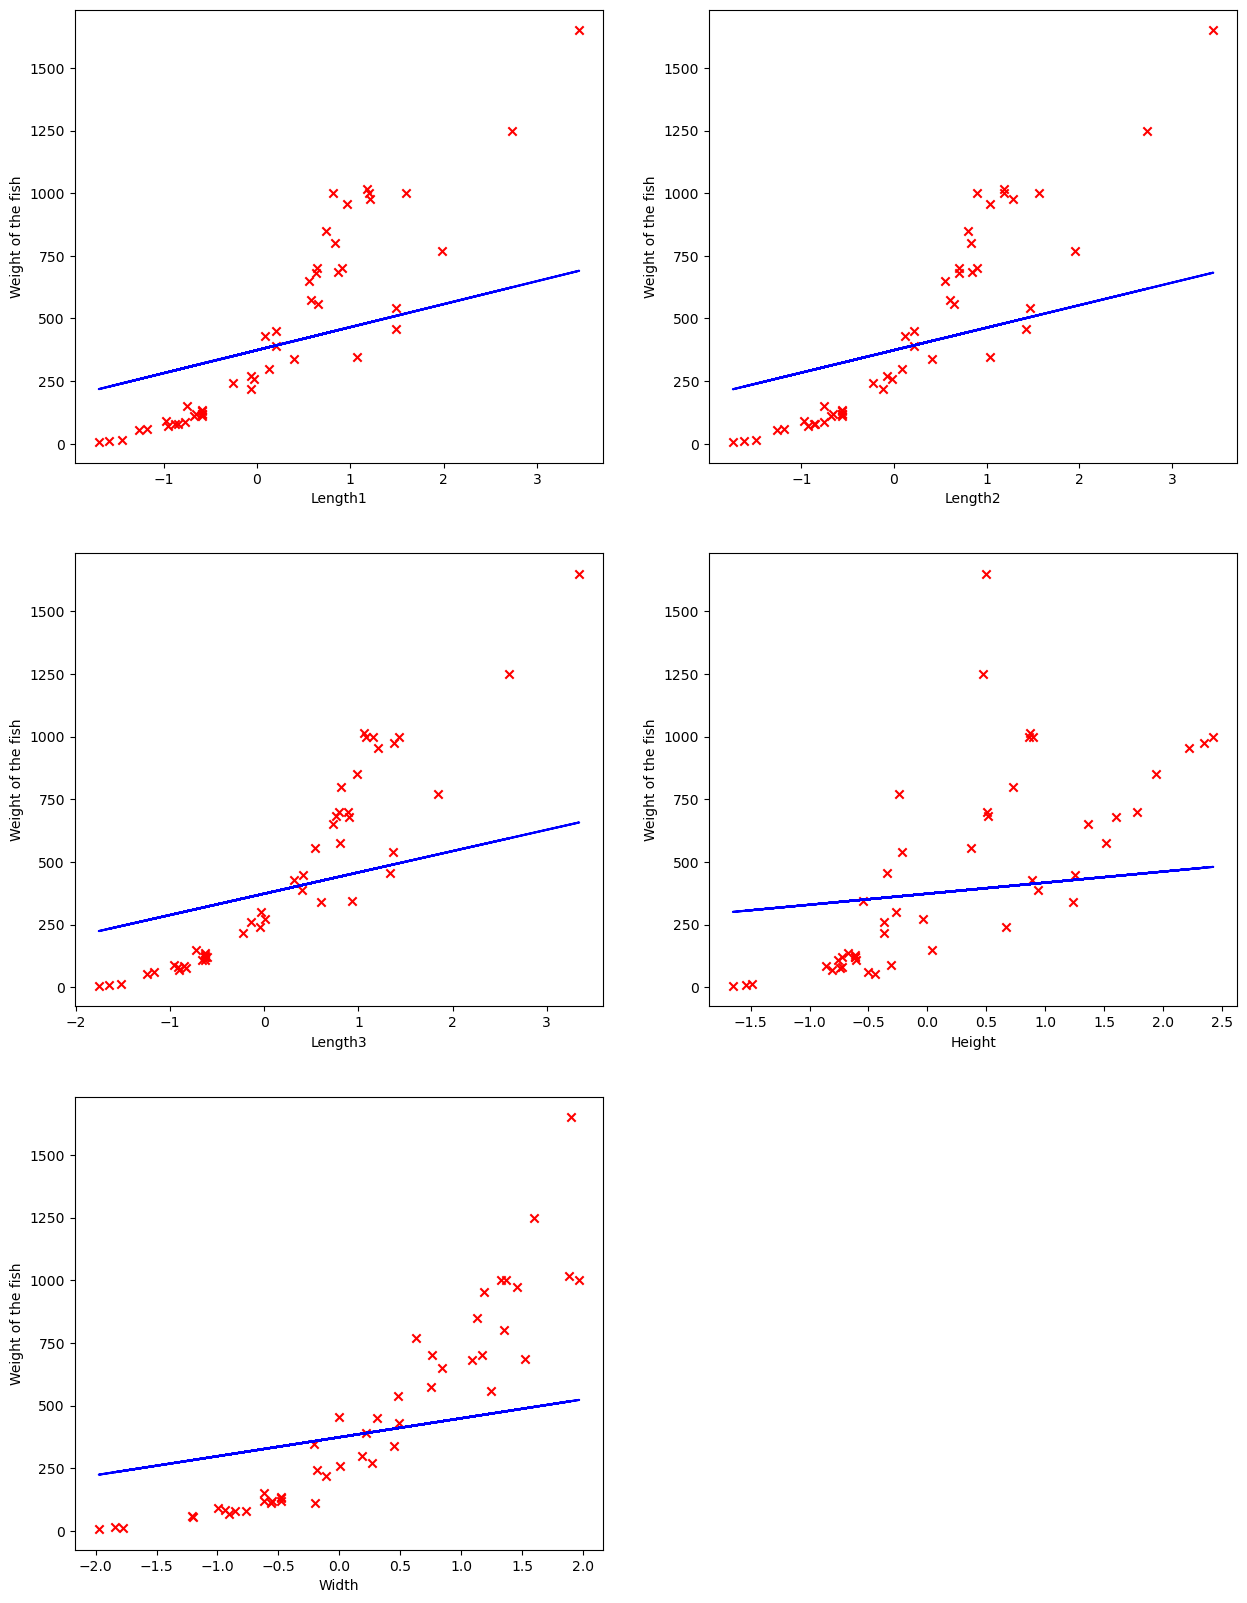

In [28]:
LR.best_fit_plot(X_test, y_test, 'Weight of the fish')

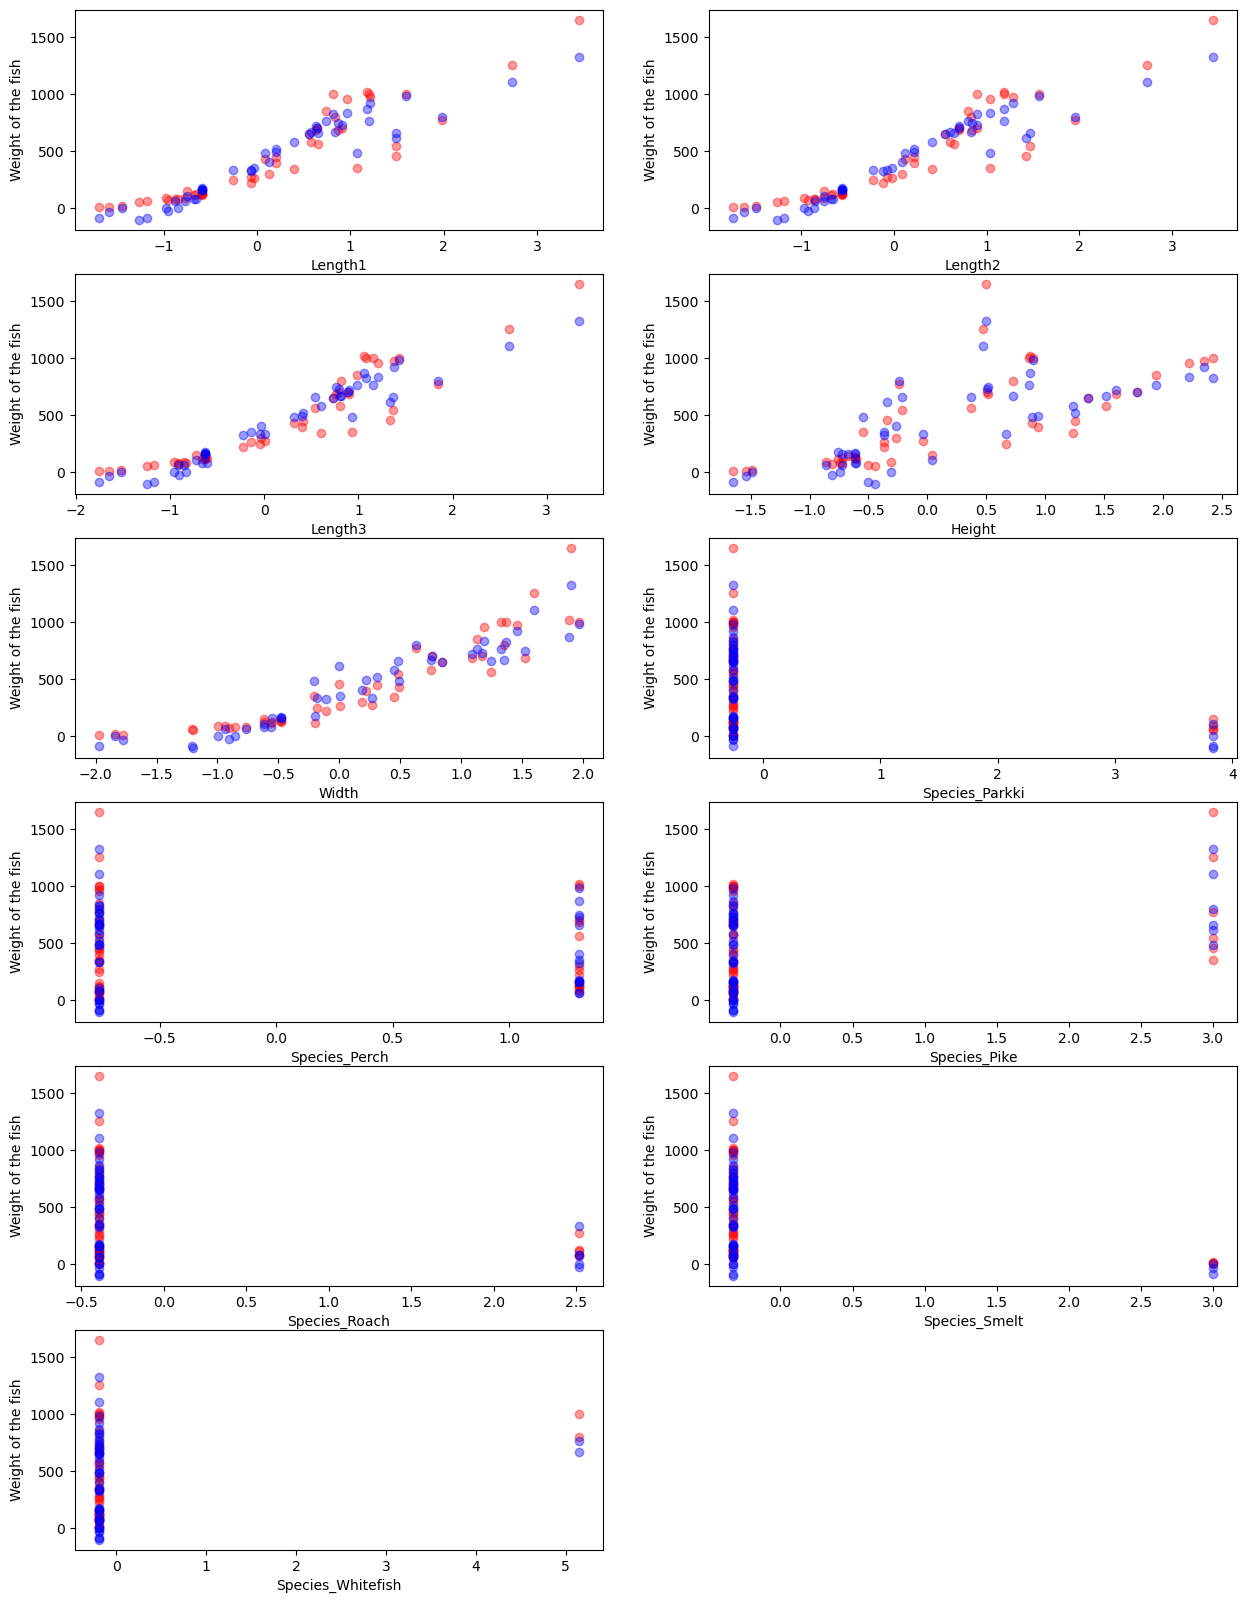

In [29]:
LR.scatter_plots(X_test, y_test, predict, 'Weight of the fish')